In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import os
sns.set(style='ticks')
project_path = os.path.abspath(os.path.relpath('../../../../', os.getcwd()))
data_1= pd.read_excel(project_path + '/BilinearNetwork/Data/Result/detection2s/detect_seizure/transformerCNN-small.xlsx').sort_values(by='patient_id')
data_2=pd.read_excel(project_path + '/BilinearNetwork/Data/Result/detection/detect_seizure/transformer-large-CNN-large.xlsx').sort_values(by='patient_id')

In [6]:
data_2

,patient_id,delay,detected
17,1,2.5982142857142856(2.0780709039970753),7/7
18,2,6.434895833333333(4.065321452793116),3/3
0,3,2.8895089285714284(1.7340792589484972),7/7
1,4,5.333333333333333(4.047897098511632),3/4
2,5,4.18515625(2.432860167323638),5/5
3,6,2.42578125(0.21025642361620012),10/10
4,7,3.6510416666666665(0.32553124983333864),3/3
5,8,3.4375(3.2704295174358404),5/5
6,9,5.2099609375(4.707259277898636),4/4
7,10,1.9681919642857142(1.6859639645603102),7/7


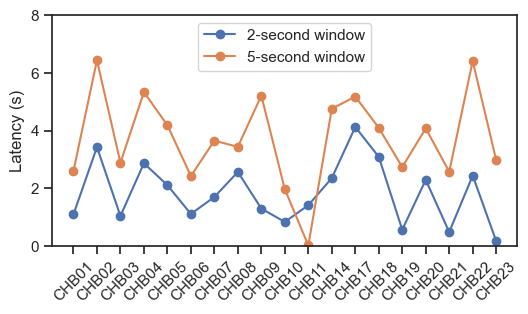

In [16]:


def plot_dual_accuracy(df1, df2,labels):
    plt.figure(figsize=(6, 3))
    accuracies1 = df1['delay']
    pattern = r'(\d+(?:\.\d+)?)\((\d+(?:\.\d+)?)\)'
    matches1 = [re.match(pattern, acc) for acc in accuracies1]
    if any(matches1):
        accuracies1 = [(float(match.group(1)), float(match.group(2))) for match in matches1]
        means1, stds1 = zip(*accuracies1)
    else:
        print("Invalid format for accuracy values in DataFrame 1.")
        return


    accuracies2 = df2['delay']
    matches2 = [re.match(pattern, acc) for acc in accuracies2]
    if any(matches2):
        accuracies2 = [(float(match.group(1)), float(match.group(2))) for match in matches2]
        means2, stds2 = zip(*accuracies2)
    else:
        print("Invalid format for accuracy values in DataFrame 2.")
        return


    x_labels = range(1, len(means1) + 1)
    x_tick_labels = ['CHB01','CHB02','CHB03','CHB04','CHB05','CHB06','CHB07','CHB08','CHB09','CHB10','CHB11','CHB14','CHB17','CHB18','CHB19','CHB20','CHB21','CHB22','CHB23']

    plt.xticks(x_labels, x_tick_labels, rotation=45)


    plt.errorbar(x_labels, means1, fmt='-o', label=labels[0])
    plt.errorbar(x_labels, means2, fmt='-o', label=labels[1])
    

   


    plt.xlabel('')
    plt.ylabel('Latency (s)')
    plt.title('')
    plt.legend()
    plt.ylim(0, 8)
    plt.show()
    



df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)


plot_dual_accuracy(df1, df2,labels=['2-second window', '5-second window'])

